<a href="https://colab.research.google.com/github/sourabhx003/Yolov4/blob/main/YoloDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("./content")

Mounted at ./content


In [2]:
import cv2 
import numpy as np

In [3]:
#copy weights file and names file and config file.

In [4]:
!cp /content/content/MyDrive/yolov4/yolov4-custom_2000.weights  -d .
!cp /content/content/MyDrive/yolov4/yolov4_custom.cfg -d .
!cp /content/content/MyDrive/yolov4/classes.txt -d .

In [4]:
#must use opencv>4.4.0 to use.

In [5]:
!pip3 install --upgrade opencv-python==4.5.1.48

     |████████████████████████████████| 50.4MB 67kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [3]:
net = cv2.dnn.readNet("yolov4-custom_2000.weights","yolov4_custom.cfg")

In [5]:
classes = []
with open("classes.txt","r") as file:
  classes = file.read().splitlines()
print(classes)

['F', 'H & M', 'M', 'H']


In [49]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

In [45]:
!cp /content/content/MyDrive/yolov4/download.jpg -d .

In [110]:
img = cv2.imread("download.jpg")

In [111]:
img = cv2.resize(img,(608,608))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [112]:
blob = cv2.dnn.blobFromImage(img,1/255,(608,608),(0,0,0),swapRB=False,crop=False)
net.setInput(blob)

In [113]:
height,width,_ = img.shape

In [114]:
op_layer_name = net.getUnconnectedOutLayersNames()
layerOutput = net.forward(op_layer_name)

In [115]:
boxes = []
confidences = []
classes_ids = []

for output in layerOutput:
  for detection in output:
    #first four are bounding box fifth is confidence score. and then classes
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    # print(class_id,confidence)
    if confidence > 0.5:
      #they all are noramlized and now we have to scale them up. so to multiply the scaling factor
      center_x = int(detection[0]*width)
      center_y = int(detection[1]*height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)
      #since they are center value we need to get x1,y1 and add width ad heigth to get x2,y2

      x1  = int(center_x - w/2)
      y1 = int(center_y - h/2)

      confidences.append((float(confidence)))
      classes_ids.append(class_id)
      boxes.append([x1,y1,w,h])




In [116]:
print(len(boxes))

12


In [117]:
# since it detects multiple bounding boxes for the same image 
# so we have to do a Non max supression with
#threshold = 0.5 use same as confidence
#nms_threshold = 0.4 (standard)

indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
print(indexes.flatten())

[7 4]


In [118]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size=(len(boxes),3))
colors.shape

(12, 3)

<Figure size 1080x720 with 0 Axes>

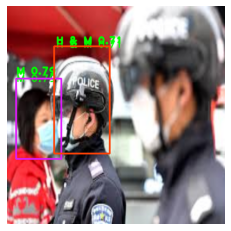

<Figure size 1080x720 with 0 Axes>

In [126]:
new_img = np.copy(img)
for i in indexes.flatten():
  x,y,w,h = boxes[i]
  label = str(classes[classes_ids[i]])
  # print(label)
  confidence = str(round(confidences[i],2))
  color = colors[i]
  cv2.rectangle(new_img,(x,y),(x+w,y+h),color,thickness=3)
  cv2.putText(new_img,label+" "+confidence,(int(x+x*0.05), int(y - y*0.05)),font, 2, (0,255,0),3,cv2.LINE_AA)
plt.imshow(new_img)
plt.axis("off")
plt.figure(figsize=(15,10))